# Biblioteca Métodos Numéricos II.

In [1]:
# Importamos las bibliotecas necesarias para nuestros ejercicios.
from Biblioteca_MNII import * 
from scipy.integrate import quad, odeint
import scipy.special as spl 
from sympy import symbols, init_printing, expand
init_printing()
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Tema 2: Interpolación.

### Sea $f: \left[2.5,7.5\right] \rightarrow R$, definida como $f(x) = \frac{2sen(x)}{x^2} + cos(x)$.

### Calcular una cota para el error de interpolación de la función cuando se toman 4 nodos y hallar una expresión del polinomio de interpolación de Lagrange y de Newton de la función para dichos nodos. 

Calculamos la derivada 4-ésima de la función.

En este caso ya que la función es 
$$
f(x) = \frac{2sen(x)}{x^2} + cos(x)
$$


Tenemos que su derivada 4-ésima es 


$$f^{(4)}(x) = \frac{(2x^4 - 72x^2 + 240) sin(x) + (x^6 + 16x^3 - 192x)cos(x)}{x^6}$$

In [2]:
#Definimos los extremos del intervalo.
a = 5/2
b = 15/2

#Definimos la función y su derivada 4-ésima.
f = lambda x: (2*np.sin(x))/x**2 + np.cos(x)
dnf = lambda x: ((2*x**4 - 72*x**2 + 240)*np.sin(x) + (x**6 + 16*x**3 - 192*x)*np.cos(x))/x**6

Inicializamos interpolación con los datos del problema:

$a = 2.5$ , $b = 7.5$ , 

$f = f(x) = \frac{2sen(x)}{x^2} + cos(x)$, 

$dnf = f^{(4)}(x) = \frac{(2x^4 - 72x^2 + 240)sen(x) + (x^6 + 16x^3 - 192x)cos(x)}{x^6}$ 

$n = 4$.

Calculamos la cota del error con la función $ErrorInter$ de nuestra biblioteca.

In [3]:
Itp = Interpolacion(f = f, dnf = dnf, a = a, b = b, n = 4)

In [4]:
Cota = Itp.ErrorInter()
print('La cota es: ',Cota)

No se ha definido los nodos
La cota es:  27.211371764187376


Ahora vamos ha comprobar que las funciones $InterLagrange$ y $InterNewton$ calculan el polinomio de interpolación correctamente y dichos polinomios cumplen la cota.
Para ello primero vamos a usar las funciones mencionadas para calcular la expresión del polinomio.

In [5]:
Itp.InterLagrange()

In [6]:
Itp.InterNewton()

Ahora definamos la funciones para el polinomio de Lagrange y de Newton, usaremos la misma ya que los dos interpoladores son iguales.

In [7]:
I = lambda x:  - 0.125559086246532*x**3 + 1.83954756661399*x**2 - 7.99587611709836*x + 9.84474619457686

Definimos una la función diferencia de $f$ menos el polinomio de interpolación correspondiente. 

In [8]:
DI = lambda x: f(x) - I(x)

Por ultimo calculamos la norma infinito de las diferencias.

In [9]:
aux = np.linspace(a, b, 1000)

# Definimos el máximo inicial como el primer valor que puede tomar DI en valor absoluto.
maximoDI = abs(DI(aux[0]))

# Vamos comprobando cada valor que toma DI en valor absoluto en la partición de puntos aux y nos quedamos con el
# que tome el valor mas alto.
for i in aux:
    if abs(DI(i)) > maximoDI:
        maximoDI = abs(DI(i))
        
print('El error en norma infinito es: ',maximoDI)

El error en norma infinito es:  0.16678757722874116


Comprobamos que se cumple la cota.

In [10]:
maximoDI < Cota 

True

## Tema 3: Integración numérica.

### Desarrollese la fórmula de cuadratura de los trapecios en el intervalo $[0, \pi]$, asi como su expresión de error. Usando la expresión del error obtenida, determinar el número de subintevalos necesarios para aproximar la siguiente integral con un error menor que $\epsilon = 1 * 10^{-7}$ : 

$$\int_{0}^{\pi} (sen x + cos x)^2 dx$$

#### $\bullet$ Desarrollo de la fórmula de cuadratura de los trapecios.

Sea $f(x) = (sen x + cos x)^2$ una funcion tal que $f \in C^2([0, \pi])$.

La fórmula de cuadratura de los trapecios es una fórmula de cuadratura cerrada con dos nodos. Tomando el intervalo propuesto $[0, \pi]$ se tendría que:

$$ \int_{0}^{\pi} f(x) dx = \frac{h}{2} (f(0) + f(\pi)) - \frac{h^3}{12}f''(\xi)$$

Donde $\xi \in [0, \pi]$ y $h = \pi-0 = \pi$ .En el caso de una fórmula compuesta, dividimos el intervalo $[0, \pi]$ en $N$ subintervalos   y en cada uno de ellos aplicamos la f.c anterior.

En el caso de la fórmula compuesta del trapecio, los nodos de cuadratura coincidirán con los extremos de los $N$ subintervalos.

Sean pues los extremos de un subintervalo cualesquiera $x_i$ y $x_{i+1}$, entonces $h = x_{i+1} - x_i = \frac{\pi}{N}$ y sustituyendo en la expresión anterior $[0, \pi]$ por $[x_i, x_{i+1}]$ se obtiene una primera expresión de la fórmula de cuadratura de los trapecios:

$$\int_{0}^{\pi} f(x) dx = \sum_{i=0}^{N-1} \int_{x_i}^{x_{i+1}} f(x) dx = \frac{h}{2}\sum_{i=0}^{N-1} (f(x_i) + f(x_{i+1})) - \frac{h^3}{12}\sum_{i=0}^{N-1} f''(\xi_i) $$

Donde $\xi \in [x_i, x_{i+1}]$

Ahora se verá que el último sumatorio, el cual se corresponde con la expresión del error, puede ser eliminado. Esto ocurre dado que:

$$  m \leq \frac{1}{N}\sum_{i=0}^{N-1} f''(\xi_i)\leq M $$


Siendo $m = min_{x \in [0, \pi]} |f''(x)|$ y $M = max_{x \in [0, \pi]} |f''(x)|$ . Por ser $f''$ continua por hipótesis, alcanzará todos los valores entre $m$ y $M$, luego existirá algun $\xi \in [0, \pi]$ tal que:

$$ f''(\xi) = \frac{1}{N}\sum_{i=0}^{N-1} f''(\xi_i)  $$

Por lo tanto:


$$ \sum_{i=0}^{N-1} f''(\xi_i) = N f''(\xi) = \frac{\pi}{h}f''(\xi) $$

Ergo, sustituyendo en la anterior expresión de la fórmula de cuadratura compuesta de los trapecios se concluye que dicha fórmula puede ser expresada de la forma:

$$\int_{0}^{\pi} f(x) dx = \sum_{i=0}^{N-1} \int_{x_i}^{x_{i+1}} f(x) = \frac{h}{2}\sum_{i=0}^{N-1} (f(x_i) + f(x_{i+1})) - \frac{\pi\, h^2}{12}f''(\xi) $$

Con $\xi \in [0, \pi].$

#### $\bullet$ Cálculo del número de subintervalos para obtener un error menor que $\epsilon$ 

Dado que ya se conoce la expresion del error para cualquier $f$ en el intervalo $[0, \pi]$, ahora se intentará acotar el error tomando el máximo de $f''$. Sea pues:

$$|E_N(f)| \leq \frac{\pi\, h^2}{12}max_{x \in [0, \pi]} |f''(x)|$$

Se estudiará la expresión de $f''$ para intentar hallar el máximo en $[0, \pi]$:

$\bullet$ $f'(x) = 2cos^2(x) - 2sin^2(x) = 2cos(2x)$

$\bullet$ $f''(x) = -4sin(2x) $

Se verá como se comporta graficamente la segunda derivada:

In [11]:
f = lambda x: (np.sin(x) + np.cos(x))**2
d2f = lambda x: -4 * np.sin(2*x)
x = np.linspace (0, np.pi, 2000)
d2fx = d2f(x)

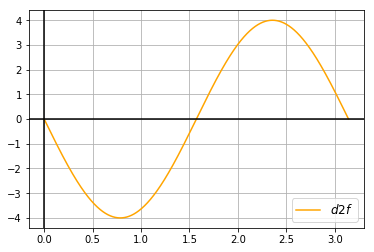

In [12]:
#representación de f
plot(x, d2fx, "-", c="orange", label= "$d2f$")
#inclusión de cuadrículas y ejes para mejor visualización
grid()
legend(prop = {'size': 12})
axhline(c="black")
axvline(c="black")

Dado que $-1\leq sin(2x) \leq 1$, se obtendrá que $-4\leq -4sin(2x) \leq 4$. Ergo el máximo de la segunda derivada será $M = 4$, tal y como se puede observar en la gráfica.

Luego la cota del error quedaría como:

$$|E_N(f)| \leq 4\frac{\pi\, h^2}{12}$$

Por tanto para que el error sea menor que $\epsilon$ bastará con que: $4\frac{\pi\, h^2}{12} = \epsilon$.

Multiplicando ambas igualdades por $3$, dividiendo por $\pi$ y aplicando la raíz cuadrada se obtiene que:

In [13]:
h = np.sqrt((3*1.e-7)/np.pi)
print('El valor de h es: ',h)

El valor de h es:  0.0003090193616185517


Finalmente, dado que $N = \frac{\pi}{h}$ se obtiene que:

In [14]:
N = np.pi/h
print('El valor de N es: ',N)

El valor de N es:  10166.329504840938


Luego serán necesarios unos $10167$ subintervalos para que el error teórico estimado sea menor que el $\epsilon$ propuesto. A continuación se hará uso de la biblioteca para ver que error se estima para las fórmulas de cuadratura compuesta del punto medio, de los trapecios y del punto medio comparando el resultado con el proporcionado por la función `quad` del módulo `scipy.integrate`.

In [15]:
cuadrar = Cuadratura(f = f, a = 0, b = np.pi, er = True, N = 5000)

In [16]:
cuadrar.PtomedioComp()

In [17]:
cuadrar.TrapecioComp()

In [18]:
cuadrar.SimpsonComp()

In [19]:
quad(f, 0, np.pi)

## Tema 4: Problemas de valor inicial para ecuaciones diferenciales de primer orden

### Consideremos el método de Crank-Nicolson definido de la siguiente forma:

$$\begin{equation*}
    \left\{
        \begin{array}{ll}
            y_{0} = y_{a},\\
            y_{n+1} = y_{n} + \frac{h}{2} [{f(t_{n},y_{n})+f(t_{n+1},y_{n+1})] }
        \end{array}
    \right.
\end{equation*}$$

### Dado $a>0$, consideramos el siguiente problema de valor inicial:

$$\begin{equation*}
    \left\{
        \begin{array}{ll}
            y' = ay,\\
            y(0) = 1
        \end{array}
    \right.
\end{equation*}$$

#### Apartado 1:
Calcular las dos primeras iteraciones del método de Crank-Nicolson. Generalizarlas para obtener explícitamente el valor de $y_{n}$, para cualquier $n \in \mathbb{R}$.

Sea $y' = f(t,y)$, se tiene que para este problema es: $f(t,y) = ay$. Empezamos calculando una fórmula explícita para hallar $y_{n}$:

$$y_{n+1} = y_{n} + \frac{h}{2}(ay_{n}+ay_{n+1}) \Longleftrightarrow y_{n+1} = y_{n} + \frac{h}{2}ay_{n} + \frac{h}{2}ay_{n+1} \Longleftrightarrow y_{n+1} - \frac{h}{2}ay_{n+1} = y_{n} + \frac{h}{2}ay_{n} \Longleftrightarrow y_{n+1} \left(1 - \frac{h}{2}a \right) = y_{n} \left(1 + \frac{h}{2}a \right) \Longleftrightarrow y_{n+1} = y_{n} \left(\frac{1 + \frac{h}{2}a}{1 - \frac{h}{2}a} \right)$$

Partiendo de $y_{0} = 1$ calculamos las dos primeras iteraciones:

$$y_{1} = y_{0} \left(\frac{1 + \frac{h}{2}a}{1 - \frac{h}{2}a} \right) = \frac{1 + \frac{h}{2}a}{1 - \frac{h}{2}a} = \frac{\frac{2+ha}{2}}{\frac{2-ha}{2}} = \frac{2+ha}{2-ha}$$

$$y_{2} = y_{1} \left(\frac{1 + \frac{h}{2}a}{1 - \frac{h}{2}a} \right) = y_{1} \left(\frac{1 + \frac{h}{2}a}{1 - \frac{h}{2}a} \right) = y_{1} \left(\frac{\frac{2+ha}{2}}{\frac{2-ha}{2}} \right) = \left(\frac{2+ha}{2-ha} \right) \left(\frac{2+ha}{2-ha} \right) = \left(\frac{2+ha}{2-ha} \right)^{2}$$

Para generalizar la expresión de $y_{n}$, vamos a probar que $y_{n} = \left(\frac{2+ha}{2-ha} \right)^{n}$.

Lo demostramospor inducción:

$1)$ Ya hemos visto que $y_{1} = \frac{2+ha}{2-ha}$

$2)$ Suponiendo como cierto que $y_{n} = \left(\frac{2+ha}{2-ha} \right)^{n}$, debería ser que $y_{n+1} = \left(\frac{2+ha}{2-ha} \right)^{n+1}$:

$$y_{n+1} = y_{n} \left(\frac{1 + \frac{h}{2}a}{1 - \frac{h}{2}a} \right) = y_{n} \left(\frac{1 + \frac{h}{2}a}{1 - \frac{h}{2}a} \right) = y_{n} \left(\frac{\frac{2+ha}{2}}{\frac{2-ha}{2}} \right) = \left(\frac{2+ha}{2-ha} \right)^{n} \left(\frac{2+ha}{2-ha} \right) = \left(\frac{2+ha}{2-ha} \right)^{n+1} \square$$

#### Apartado 2:
Indicar cuál es el mayor valor $h^{*}>0$ tal que el método de de Crank-Nicolson está bien definido para todo $h \in (0,h^{*})$. ¿Qué ocurriría si $h \in (h^{*}, \infty)$?

Sea $y = e^{ax}$, se tiene que:

$1)$ $y' = ae^{ax}$, es decir, $y' = ay$.

$2)$ $y(0) = e^{a \cdot 0} = 1$

Por lo tanto, $y = e^{ax}$ es la solución exacta del problema, y se tiene que $e^{ax}>0 \quad \forall x \in \mathbb{R}$. Teniendo en cuenta que $y_{n} = \left(\frac{2+ha}{2-ha} \right)^{n}$, debe verificarse que $y_{n} > 0$. Es fácil ver que si $h = \frac{2}{a}$, entonces $2 - ha = 2- \frac{2}{a}a = 0$, lo que anula el denominador, por tanto $h \neq \frac{2}{a}$. Para que la sucesión $\{y_{n} \}$ no sea oscilante, debe verificarse que $\frac{2+ha}{2-ha} >0$, y como $h>0$ y $a>0$, debe ser entonces que $2-ha>0 \Longleftrightarrow 2>ha \Longleftrightarrow h< \frac{2}{a}$. Por lo tanto, para $h^{*} = \frac{2}{a}$, el método de Crank-Nicolson está bien definido para todo $h \in (0,h^{*})$. En caso contrario, la sucesión $\{y_{n} \}$ sería oscilante, lo que no es cierto para la solución exacta, y por tanto el método no estaría bien definido.

#### Apartado 3:
Verificar los resultados anteriores y comparar el método de Crank-Nicolson Con los métodos de Euler, Runge Kutta y Adams-Bashforth.

Empezamos definiendo una función que implemente el método de Crank-Nicolson, específico para nuestro problema:

In [20]:
def Crank_Nicolson(a, b, h, a1, y0):
    
    if a>b or h<0 or a1<0: # No imponemos h<(a1/2) para poder reutilizarla.
        
        print('Error en los parámetros de entrada.')
        return
        
    N = int( round ((b-a)/h))
    lista_t = linspace(a, b, N+1)
    sol = [y0]
    
    for i in range (N):
        
        yn_1 = ((2 + h*a1)/(2 - h*a1))
        ex = i+1
        yn = yn_1**ex
        sol.append(yn)
        
    return lista_t, sol

Utilizaremos para nuestro ejemplo $a=10$, así que $\frac{2}{10} = 0.2$, por lo que calcularemos la solución por el método de Crank-Nicolson para $h=0.05<0.2$ (el método está bien definido) y para $h=0.25>0.2$ (el método no está bien definido), en el intervalo $[a,b] = [0,1]$.

In [21]:
lista_t, sol_cn = Crank_Nicolson(0, 1, 0.05, 10, 1)
lista, sol_cn_2 = Crank_Nicolson(0, 1, 0.25, 10, 1)

Definimos a continuación la función que es solución exacta de nuestro problema para poder comparar:

In [22]:
f = lambda x: exp(10*x)

Mostramos la solución exacta en el intervalo $[0,1]$ junto a las soluciones calculadas:

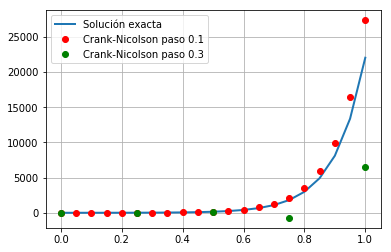

In [23]:
plot(lista_t, f(lista_t), lw=2, label=u'Solución exacta')
plot(lista_t, sol_cn, 'o', c='red', label='Crank-Nicolson paso ' + str(0.1))
plot(lista, sol_cn_2, 'o', c='green', label='Crank-Nicolson paso ' + str(0.3))
legend(loc='best')
grid()

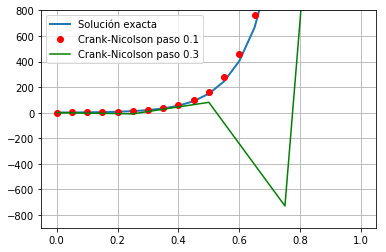

In [24]:
plot(lista_t, f(lista_t), lw=2, label=u'Solución exacta')
plot(lista_t, sol_cn, 'o', c='red', label='Crank-Nicolson paso ' + str(0.1))
plot(lista, sol_cn_2, '-', c='green', label='Crank-Nicolson paso ' + str(0.3))
ylim(-900, 800)
legend(loc='best')
grid()

Donde se puede ver que el método de Crank-Nicolson aproxima la solución cuando $h< \frac{2}{a}$.

Por último, utilizamos la Biblioteca para calcular la solución mediante los métodos de Euler, Runge Kutta y Adams-Bashforth. Empezamos definiendo la función de dos variables que vamos a utilizar:

In [25]:
def g(t, y): return 10*y

Creamos el objeto y lo dotamos con los datos del problema:

In [26]:
pvi = EDO_PVI(f = g, x0 = 1, a = 0, b = 1, h = 0.05, sol = True)

Calculamos las soluciones mediantes los distintos métodos y sacamos los puntos para las gráficas:

In [27]:
e = pvi.Euler()
euler = max(e)
r = pvi.Runge_Kutta()
rg = max(r)
ab = pvi.Adams_Bashforth()
adams = max(ab)

Mostramos las soluciones de los distintos métodos junto a la del método de Crank-Nicolson:

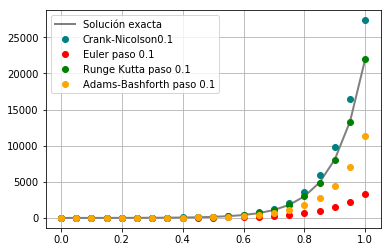

In [28]:
plot(lista_t, f(lista_t), c='gray', lw=2, label=u'Solución exacta')
plot(lista_t, sol_cn, 'o', c='teal', label='Crank-Nicolson' + str(0.1))
plot(lista_t, euler, 'o', c='red', label='Euler paso ' + str(0.1))
plot(lista_t, rg, 'o', c='green', label='Runge Kutta paso ' + str(0.1))
plot(lista_t, adams, 'o', c='orange', label='Adams-Bashforth paso ' + str(0.1))
legend(loc='best')
grid()

Como se puede observar para el intervalo escogido, mientras que los métodos de Euler y Adams-Bashforth son menos eficaces que Crank-Nicolson para este problema, el método de Runge Kutta es el que más se aproxima a la solución exacta.

## Tema 5: Sistemas de dos ecuaciones y ecuaciones de segundo orden.

Sea $x^2 y'' + xy' + (x^2 - 4)y = 0 $ una ecuación de Bessel. Transformando esta ecuación de orden $2$ en un sistema de $2$ ecuaciones de orden $1$, tenemos las funciones:

$$
f^1(x, y_1, y_2) = y_2,  \\
f^2(x, y_1, y_2) = \frac{-xy_2 - (x^2 - 4)y_1}{x^2}.
$$

Definiendo ahora $t := x$, $x := y_1$ e $y := y_2$ para tener las ecuaciones de la forma que nos interesa tenermos:

$$
f(t, x, y) = y, \\
g(t, x, y) = \frac{-ty - (t^2 - 4)x}{t^2}.
$$

Intentemos resolver este sistema, en el intervalo $[1, 10]$, mediante los métodos de Euler, Euler-Cauchy, Heunn y Runge-Kutta.

La ecuación se Bessel tiene dos posibles soluciones, primer y segundo tipo, para asegurarnos de que obtenemos una de estas soluciones y no una combinación de ambas consideramos el problema de valores iniciales que nos asegure esto, para ello los obtenemos de la siguiente forma:

In [29]:
# Sacamos las puntos que definen la solución de la ecuación de Bessel a traves de la función jv definida en el módulo scipy.special.
# Su primer valor será el valor inicial x0.
x = np.linspace(1, 20, 70)
x0 = spl.jv(2, x)[0]

# Sacamos también los puntos que definen la derivada con la función jvp en el mismo módulo.
# Su primer valor será el valor inicial y0.
y0 = spl.jvp(2, x, 1)[0]

print('El valor inicial x0 es: ', x0)
print('El valor inicial y0 es: ', y0)

El valor inicial x0 es:  0.1149034849319005
El valor inicial y0 es:  0.21024361588113258


In [30]:
# Definimos las funciones:
f = lambda t, x, y: y
g = lambda t, x, y: (-t*y - (t**2 - 4)*x)/(t**2)

# Definimos el vector de instantes t:
t = np.linspace(1, 20, 70)

Sacamos las distintas soluciones dadas por los métodos:

In [31]:
Sol = EDO_Sistemas(f, g, x0, y0, t)

In [32]:
sol_Euler = Sol.Euler()

In [33]:
sol_Euler_Cauchy = Sol.Euler_Cauchy()

In [34]:
sol_Heunn = Sol.Heunn()

In [35]:
sol_Runge_Kutta = Sol.Runge_Kutta()

Sacamos la solución dada por Python:

In [36]:
sol_Bessel = spl.jv(2, x)

Ahora tenemos los puntos que definen la solución de Bessel, dada por Python, y los comparamos con los primeros puntos dados por los métodos, ya que estos representan la solución a la ecuación.

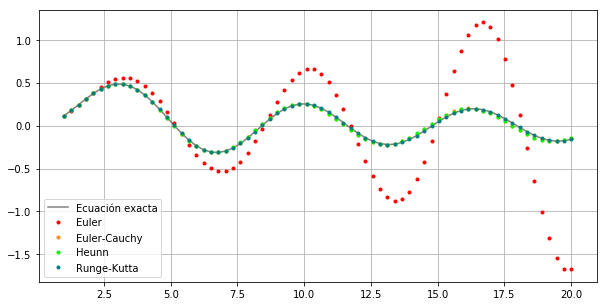

In [37]:
figure(figsize=(10, 5))
plot(t, sol_Bessel, '-', c = 'gray', label = 'Ecuación exacta')
plot(t, sol_Euler[0], '.', c = 'red', label = 'Euler')
plot(t, sol_Euler_Cauchy[0], '.', c = 'darkorange', label = 'Euler-Cauchy')
plot(t, sol_Heunn[0], '.', c = 'lime', label = 'Heunn')
plot(t, sol_Runge_Kutta[0], '.', c = 'teal', label = 'Runge-Kutta')
legend()
grid()

Todos los métodos tienen una aproximación exacta a la solución, mientras que Euler se aleja cada vez mas de la solución exacta.

Trabajo realizado por:
   * B. B., Esteban.
   * C. P., Manuel.
   * C. H., Juan Luis.
   * V. R., Paula.